## Load data

In [1]:
from pyAudioAnalysis import audioBasicIO as aIO;
from pyAudioAnalysis import audioSegmentation as aS;
from pydub import AudioSegment;
from pydub.silence import split_on_silence;
import os;
import pandas as pd;
import numpy as np;
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
suffix_in = 'denoised'
suffix_out = 'final'

# Create new folders for the clips with removed silence
# Folders created within the Data folder
if not os.path.isdir('../Data/Train_%s' %suffix_out):
    os.mkdir('../Data/Train_%s' %suffix_out)

if not os.path.isdir('../Data/Test_%s' %suffix_out):
    os.mkdir('../Data/Test_%s' %suffix_out)

In [3]:
# Getting all the files from the training set
files_train = os.listdir('Train_%s' %suffix_in)
files_test = os.listdir('Test_%s' %suffix_in)

# sorting the files by name
files_train.sort()
files_test.sort()


# I'm using MacOS, and it by default has this .DS_store file, which I can't get rid of. 
# It's the first file in the folder.
# That's why I'm removing it. If you are using this code in your own PC, this might not apply to you.
# in that case, comment out the del function line.
# del files_train[0] 

In [4]:
# add path name to the file name
fnames_train = []
fnames_test  = []
for i in range(len(files_train)):
    fname = "Train_%s/%s" %(suffix_in, files_train[i])
    fnames_train.append(fname)
    
for i in range(len(files_test)):
    fname = "Test_%s/%s" %(suffix_in, files_test[i])
    fnames_test.append(fname)

# sort the list of file names with path     
fnames_train.sort()
fnames_test.sort()

In [5]:
# Load the categories dataframes
df_test = pd.read_csv('Categories_test.csv')
df_train = pd.read_csv('Categories_train.csv')

## Helper functions

In [6]:
#defining a function that turns the frame segment from seconds to miliseconds, because pydub operates on milisecs.
# It also depends on how many slices are returned. 
def turn_mSec(segments):
    for i in range(len(segments)):
        for j in range(len(segments[i])):
            segments[i][j] = int(1000*segments[i][j])
    
    return segments

In [7]:
#defining a function to get the indicated segments, slice the sound, and then combine those slices.

def get_combine_slices(segments, sound):
    final_sound = sound[segments[0][0]:segments[0][1]]
    
    if len(segments)>1:
        for i in range(1,len(segments)):
            segment = segments[i]
            slice_i = sound[segment[0]:segment[1]]
            final_sound = final_sound+slice_i
    
    return final_sound

In [8]:
def display_time(seconds):
    if seconds <= 60:
        print('Duration: %f (s)' %seconds)
    elif 60 < seconds <= 3600:
        print('Duration: %f (min)' %(seconds/60))
    else:
        print('Duration: %f (h)' %(seconds/3600))

## Example

In [ ]:
# 1003_MTI_DIS_XX
# 1003_MTI_FEA_XX
# 1002_IOM_NEU_XX
# 1002_WSI_ANG_XX - 127
# 1002_MTI_DIS_XX - 105
# 1004_ITS_HAP_XX - 222
# 1005_ITH_HAP_XX - 283
# 1003_TIE_DIS_XX - 183

# 1003_IWW_NEU_XX - 168
# 1005_IOM_SAD_XX - 279
# 1001_TAI_NEU_XX - 47
# 1005_MTI_SAD_XX - 309 - bad
# 1005_TSI_NEU_XX - 326
# 1002_IWL_DIS_XX - 93
# 1005_WSI_FEA_XX - 330
# 1007_IOM_ANG_XX - 341 - bad
# 1010_TAI_FEA_XX - 507
# 1011_TSI_DIS_XX - 585
# 1011_IWW_FEA_XX - 562 - bad?
# 1011_WSI_HAP_XX - 593
df_train.loc[df_train.FileID=='1011_WSI_HAP_XX']

In [ ]:
i = 593
Fs, signal = aIO.read_audio_file(fnames_train[i]);
# segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 0.4, weight = 0.4, plot = True);
segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 1, weight = 0.25, plot = True);
segments = turn_mSec(segments);  
sound = AudioSegment.from_file(fnames_train[i]);

print(segments)
# sound

final_sound = get_combine_slices(segments, sound)
final_sound

## Train set
Remove silences from the _**train**_ set and save the clips to files

In [10]:
# Getting new short clips and saving them on file. This is for the train set. 
pathname = 'Train_%s/' %suffix_out;
oldDur = [];
newDur = [];

time_start = time.time()
for i in np.arange(0,len(fnames_train),1):    
    print('%i/%i' %(i,len(fnames_train)))
    Fs, signal = aIO.read_audio_file(fnames_train[i]);
    segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 1, weight = 0.25, plot = False);
    segments = turn_mSec(segments);
    
    sound = AudioSegment.from_file(fnames_train[i]);
    
    final_sound = get_combine_slices(segments, sound);
    
    new_fname_path = pathname + files_train[i].split('.')[0]
    output_file = "{}.wav".format(new_fname_path)
    print("Exporting file", output_file)
    final_sound.export(output_file, format="wav")
    
    old_dur = sound.duration_seconds
    new_dur = final_sound.duration_seconds
    
    oldDur.append((files_train[i], old_dur));
    newDur.append((files_train[i], new_dur));

time_end = time.time()
display_time(time_end-time_start)

0/4876
Exporting file Train_final/1001_DFA_ANG_XX.wav
1/4876
Exporting file Train_final/1001_DFA_DIS_XX.wav
2/4876
Exporting file Train_final/1001_DFA_FEA_XX.wav
3/4876
Exporting file Train_final/1001_DFA_HAP_XX.wav
4/4876
Exporting file Train_final/1001_DFA_NEU_XX.wav
5/4876
Exporting file Train_final/1001_DFA_SAD_XX.wav
6/4876
Exporting file Train_final/1001_IEO_NEU_XX.wav
7/4876
Exporting file Train_final/1001_IOM_ANG_XX.wav
8/4876
Exporting file Train_final/1001_IOM_DIS_XX.wav
9/4876
Exporting file Train_final/1001_IOM_FEA_XX.wav
10/4876
Exporting file Train_final/1001_IOM_HAP_XX.wav
11/4876
Exporting file Train_final/1001_IOM_NEU_XX.wav
12/4876
Exporting file Train_final/1001_IOM_SAD_XX.wav
13/4876
Exporting file Train_final/1001_ITH_ANG_XX.wav
14/4876
Exporting file Train_final/1001_ITH_DIS_XX.wav
15/4876
Exporting file Train_final/1001_ITH_FEA_XX.wav
16/4876
Exporting file Train_final/1001_ITH_HAP_XX.wav
17/4876
Exporting file Train_final/1001_ITH_NEU_XX.wav
18/4876
Exporting fi

Exporting file Train_final/1003_ITH_HAP_XX.wav
150/4876
Exporting file Train_final/1003_ITH_NEU_XX.wav
151/4876
Exporting file Train_final/1003_ITH_SAD_XX.wav
152/4876
Exporting file Train_final/1003_ITS_ANG_XX.wav
153/4876
Exporting file Train_final/1003_ITS_DIS_XX.wav
154/4876
Exporting file Train_final/1003_ITS_FEA_XX.wav
155/4876
Exporting file Train_final/1003_ITS_HAP_XX.wav
156/4876
Exporting file Train_final/1003_ITS_NEU_XX.wav
157/4876
Exporting file Train_final/1003_ITS_SAD_XX.wav
158/4876
Exporting file Train_final/1003_IWL_ANG_XX.wav
159/4876
Exporting file Train_final/1003_IWL_DIS_XX.wav
160/4876
Exporting file Train_final/1003_IWL_FEA_XX.wav
161/4876
Exporting file Train_final/1003_IWL_HAP_XX.wav
162/4876
Exporting file Train_final/1003_IWL_NEU_XX.wav
163/4876
Exporting file Train_final/1003_IWL_SAD_XX.wav
164/4876
Exporting file Train_final/1003_IWW_ANG_XX.wav
165/4876
Exporting file Train_final/1003_IWW_DIS_XX.wav
166/4876
Exporting file Train_final/1003_IWW_FEA_XX.wav
1

Exporting file Train_final/1005_IWL_SAD_XX.wav
298/4876
Exporting file Train_final/1005_IWW_ANG_XX.wav
299/4876
Exporting file Train_final/1005_IWW_DIS_XX.wav
300/4876
Exporting file Train_final/1005_IWW_FEA_XX.wav
301/4876
Exporting file Train_final/1005_IWW_HAP_XX.wav
302/4876
Exporting file Train_final/1005_IWW_NEU_XX.wav
303/4876
Exporting file Train_final/1005_IWW_SAD_XX.wav
304/4876
Exporting file Train_final/1005_MTI_ANG_XX.wav
305/4876
Exporting file Train_final/1005_MTI_DIS_XX.wav
306/4876
Exporting file Train_final/1005_MTI_FEA_XX.wav
307/4876
Exporting file Train_final/1005_MTI_HAP_XX.wav
308/4876
Exporting file Train_final/1005_MTI_NEU_XX.wav
309/4876
Exporting file Train_final/1005_MTI_SAD_XX.wav
310/4876
Exporting file Train_final/1005_TAI_ANG_XX.wav
311/4876
Exporting file Train_final/1005_TAI_DIS_XX.wav
312/4876
Exporting file Train_final/1005_TAI_FEA_XX.wav
313/4876
Exporting file Train_final/1005_TAI_HAP_XX.wav
314/4876
Exporting file Train_final/1005_TAI_NEU_XX.wav
3

Exporting file Train_final/1009_TIE_ANG_XX.wav
445/4876
Exporting file Train_final/1009_TIE_DIS_XX.wav
446/4876
Exporting file Train_final/1009_TIE_FEA_XX.wav
447/4876
Exporting file Train_final/1009_TIE_HAP_XX.wav
448/4876
Exporting file Train_final/1009_TIE_NEU_XX.wav
449/4876
Exporting file Train_final/1009_TIE_SAD_XX.wav
450/4876
Exporting file Train_final/1009_TSI_ANG_XX.wav
451/4876
Exporting file Train_final/1009_TSI_DIS_XX.wav
452/4876
Exporting file Train_final/1009_TSI_FEA_XX.wav
453/4876
Exporting file Train_final/1009_TSI_HAP_XX.wav
454/4876
Exporting file Train_final/1009_TSI_NEU_XX.wav
455/4876
Exporting file Train_final/1009_TSI_SAD_XX.wav
456/4876
Exporting file Train_final/1009_WSI_ANG_XX.wav
457/4876
Exporting file Train_final/1009_WSI_DIS_XX.wav
458/4876
Exporting file Train_final/1009_WSI_FEA_XX.wav
459/4876
Exporting file Train_final/1009_WSI_HAP_XX.wav
460/4876
Exporting file Train_final/1009_WSI_NEU_XX.wav
461/4876
Exporting file Train_final/1009_WSI_SAD_XX.wav
4

Exporting file Train_final/1011_WSI_HAP_XX.wav
594/4876
Exporting file Train_final/1011_WSI_NEU_XX.wav
595/4876
Exporting file Train_final/1011_WSI_SAD_XX.wav
596/4876
Exporting file Train_final/1012_DFA_ANG_XX.wav
597/4876
Exporting file Train_final/1012_DFA_DIS_XX.wav
598/4876
Exporting file Train_final/1012_DFA_FEA_XX.wav
599/4876
Exporting file Train_final/1012_DFA_HAP_XX.wav
600/4876
Exporting file Train_final/1012_DFA_NEU_XX.wav
601/4876
Exporting file Train_final/1012_DFA_SAD_XX.wav
602/4876
Exporting file Train_final/1012_IEO_NEU_XX.wav
603/4876
Exporting file Train_final/1012_IOM_ANG_XX.wav
604/4876
Exporting file Train_final/1012_IOM_DIS_XX.wav
605/4876
Exporting file Train_final/1012_IOM_FEA_XX.wav
606/4876
Exporting file Train_final/1012_IOM_HAP_XX.wav
607/4876
Exporting file Train_final/1012_IOM_NEU_XX.wav
608/4876
Exporting file Train_final/1012_IOM_SAD_XX.wav
609/4876
Exporting file Train_final/1012_ITH_ANG_XX.wav
610/4876
Exporting file Train_final/1012_ITH_DIS_XX.wav
6

Exporting file Train_final/1015_IOM_SAD_XX.wav
743/4876
Exporting file Train_final/1015_ITH_ANG_XX.wav
744/4876
Exporting file Train_final/1015_ITH_DIS_XX.wav
745/4876
Exporting file Train_final/1015_ITH_FEA_XX.wav
746/4876
Exporting file Train_final/1015_ITH_HAP_XX.wav
747/4876
Exporting file Train_final/1015_ITH_NEU_XX.wav
748/4876
Exporting file Train_final/1015_ITH_SAD_XX.wav
749/4876
Exporting file Train_final/1015_ITS_ANG_XX.wav
750/4876
Exporting file Train_final/1015_ITS_DIS_XX.wav
751/4876
Exporting file Train_final/1015_ITS_FEA_XX.wav
752/4876
Exporting file Train_final/1015_ITS_HAP_XX.wav
753/4876
Exporting file Train_final/1015_ITS_NEU_XX.wav
754/4876
Exporting file Train_final/1015_ITS_SAD_XX.wav
755/4876
Exporting file Train_final/1015_IWL_ANG_XX.wav
756/4876
Exporting file Train_final/1015_IWL_DIS_XX.wav
757/4876
Exporting file Train_final/1015_IWL_FEA_XX.wav
758/4876
Exporting file Train_final/1015_IWL_HAP_XX.wav
759/4876
Exporting file Train_final/1015_IWL_NEU_XX.wav
7

Exporting file Train_final/1017_IWL_DIS_XX.wav
891/4876
Exporting file Train_final/1017_IWL_FEA_XX.wav
892/4876
Exporting file Train_final/1017_IWL_HAP_XX.wav
893/4876
Exporting file Train_final/1017_IWL_NEU_XX.wav
894/4876
Exporting file Train_final/1017_IWL_SAD_XX.wav
895/4876
Exporting file Train_final/1017_IWW_ANG_XX.wav
896/4876
Exporting file Train_final/1017_IWW_DIS_XX.wav
897/4876
Exporting file Train_final/1017_IWW_FEA_XX.wav
898/4876
Exporting file Train_final/1017_IWW_HAP_XX.wav
899/4876
Exporting file Train_final/1017_IWW_NEU_XX.wav
900/4876
Exporting file Train_final/1017_IWW_SAD_XX.wav
901/4876
Exporting file Train_final/1017_MTI_ANG_XX.wav
902/4876
Exporting file Train_final/1017_MTI_DIS_XX.wav
903/4876
Exporting file Train_final/1017_MTI_FEA_XX.wav
904/4876
Exporting file Train_final/1017_MTI_HAP_XX.wav
905/4876
Exporting file Train_final/1017_MTI_NEU_XX.wav
906/4876
Exporting file Train_final/1017_MTI_SAD_XX.wav
907/4876
Exporting file Train_final/1017_TAI_ANG_XX.wav
9

Exporting file Train_final/1019_TAI_DIS_XX.wav
1037/4876
Exporting file Train_final/1019_TAI_FEA_XX.wav
1038/4876
Exporting file Train_final/1019_TAI_HAP_XX.wav
1039/4876
Exporting file Train_final/1019_TAI_NEU_XX.wav
1040/4876
Exporting file Train_final/1019_TAI_SAD_XX.wav
1041/4876
Exporting file Train_final/1019_TIE_ANG_XX.wav
1042/4876
Exporting file Train_final/1019_TIE_DIS_XX.wav
1043/4876
Exporting file Train_final/1019_TIE_FEA_XX.wav
1044/4876
Exporting file Train_final/1019_TIE_HAP_XX.wav
1045/4876
Exporting file Train_final/1019_TIE_NEU_XX.wav
1046/4876
Exporting file Train_final/1019_TIE_SAD_XX.wav
1047/4876
Exporting file Train_final/1019_TSI_ANG_XX.wav
1048/4876
Exporting file Train_final/1019_TSI_DIS_XX.wav
1049/4876
Exporting file Train_final/1019_TSI_FEA_XX.wav
1050/4876
Exporting file Train_final/1019_TSI_HAP_XX.wav
1051/4876
Exporting file Train_final/1019_TSI_NEU_XX.wav
1052/4876
Exporting file Train_final/1019_TSI_SAD_XX.wav
1053/4876
Exporting file Train_final/1019

Exporting file Train_final/1021_TSI_ANG_XX.wav
1182/4876
Exporting file Train_final/1021_TSI_DIS_XX.wav
1183/4876
Exporting file Train_final/1021_TSI_FEA_XX.wav
1184/4876
Exporting file Train_final/1021_TSI_HAP_XX.wav
1185/4876
Exporting file Train_final/1021_TSI_NEU_XX.wav
1186/4876
Exporting file Train_final/1021_TSI_SAD_XX.wav
1187/4876
Exporting file Train_final/1021_WSI_ANG_XX.wav
1188/4876
Exporting file Train_final/1021_WSI_DIS_XX.wav
1189/4876
Exporting file Train_final/1021_WSI_FEA_XX.wav
1190/4876
Exporting file Train_final/1021_WSI_HAP_XX.wav
1191/4876
Exporting file Train_final/1021_WSI_NEU_XX.wav
1192/4876
Exporting file Train_final/1021_WSI_SAD_XX.wav
1193/4876
Exporting file Train_final/1022_DFA_ANG_XX.wav
1194/4876
Exporting file Train_final/1022_DFA_DIS_XX.wav
1195/4876
Exporting file Train_final/1022_DFA_FEA_XX.wav
1196/4876
Exporting file Train_final/1022_DFA_HAP_XX.wav
1197/4876
Exporting file Train_final/1022_DFA_NEU_XX.wav
1198/4876
Exporting file Train_final/1022

Exporting file Train_final/1023_WSI_SAD_XX.wav
1327/4876
Exporting file Train_final/1024_DFA_ANG_XX.wav
1328/4876
Exporting file Train_final/1024_DFA_DIS_XX.wav
1329/4876
Exporting file Train_final/1024_DFA_FEA_XX.wav
1330/4876
Exporting file Train_final/1024_DFA_HAP_XX.wav
1331/4876
Exporting file Train_final/1024_DFA_NEU_XX.wav
1332/4876
Exporting file Train_final/1024_DFA_SAD_XX.wav
1333/4876
Exporting file Train_final/1024_IEO_NEU_XX.wav
1334/4876
Exporting file Train_final/1024_IOM_ANG_XX.wav
1335/4876
Exporting file Train_final/1024_IOM_DIS_XX.wav
1336/4876
Exporting file Train_final/1024_IOM_FEA_XX.wav
1337/4876
Exporting file Train_final/1024_IOM_HAP_XX.wav
1338/4876
Exporting file Train_final/1024_IOM_NEU_XX.wav
1339/4876
Exporting file Train_final/1024_IOM_SAD_XX.wav
1340/4876
Exporting file Train_final/1024_ITH_ANG_XX.wav
1341/4876
Exporting file Train_final/1024_ITH_DIS_XX.wav
1342/4876
Exporting file Train_final/1024_ITH_FEA_XX.wav
1343/4876
Exporting file Train_final/1024

Exporting file Train_final/1026_IOM_FEA_XX.wav
1471/4876
Exporting file Train_final/1026_IOM_HAP_XX.wav
1472/4876
Exporting file Train_final/1026_IOM_NEU_XX.wav
1473/4876
Exporting file Train_final/1026_IOM_SAD_XX.wav
1474/4876
Exporting file Train_final/1026_ITH_ANG_XX.wav
1475/4876
Exporting file Train_final/1026_ITH_DIS_XX.wav
1476/4876
Exporting file Train_final/1026_ITH_FEA_XX.wav
1477/4876
Exporting file Train_final/1026_ITH_HAP_XX.wav
1478/4876
Exporting file Train_final/1026_ITH_NEU_XX.wav
1479/4876
Exporting file Train_final/1026_ITH_SAD_XX.wav
1480/4876
Exporting file Train_final/1026_ITS_ANG_XX.wav
1481/4876
Exporting file Train_final/1026_ITS_DIS_XX.wav
1482/4876
Exporting file Train_final/1026_ITS_FEA_XX.wav
1483/4876
Exporting file Train_final/1026_ITS_HAP_XX.wav
1484/4876
Exporting file Train_final/1026_ITS_NEU_XX.wav
1485/4876
Exporting file Train_final/1026_ITS_SAD_XX.wav
1486/4876
Exporting file Train_final/1026_IWL_ANG_XX.wav
1487/4876
Exporting file Train_final/1026

Exporting file Train_final/1030_ITS_FEA_XX.wav
1617/4876
Exporting file Train_final/1030_ITS_HAP_XX.wav
1618/4876
Exporting file Train_final/1030_ITS_NEU_XX.wav
1619/4876
Exporting file Train_final/1030_ITS_SAD_XX.wav
1620/4876
Exporting file Train_final/1030_IWL_ANG_XX.wav
1621/4876
Exporting file Train_final/1030_IWL_DIS_XX.wav
1622/4876
Exporting file Train_final/1030_IWL_FEA_XX.wav
1623/4876
Exporting file Train_final/1030_IWL_HAP_XX.wav
1624/4876
Exporting file Train_final/1030_IWL_NEU_XX.wav
1625/4876
Exporting file Train_final/1030_IWL_SAD_XX.wav
1626/4876
Exporting file Train_final/1030_IWW_ANG_XX.wav
1627/4876
Exporting file Train_final/1030_IWW_DIS_XX.wav
1628/4876
Exporting file Train_final/1030_IWW_FEA_XX.wav
1629/4876
Exporting file Train_final/1030_IWW_HAP_XX.wav
1630/4876
Exporting file Train_final/1030_IWW_NEU_XX.wav
1631/4876
Exporting file Train_final/1030_IWW_SAD_XX.wav
1632/4876
Exporting file Train_final/1030_MTI_ANG_XX.wav
1633/4876
Exporting file Train_final/1030

Exporting file Train_final/1033_IWW_DIS_XX.wav
1762/4876
Exporting file Train_final/1033_IWW_FEA_XX.wav
1763/4876
Exporting file Train_final/1033_IWW_HAP_XX.wav
1764/4876
Exporting file Train_final/1033_IWW_NEU_XX.wav
1765/4876
Exporting file Train_final/1033_IWW_SAD_XX.wav
1766/4876
Exporting file Train_final/1033_MTI_ANG_XX.wav
1767/4876
Exporting file Train_final/1033_MTI_DIS_XX.wav
1768/4876
Exporting file Train_final/1033_MTI_FEA_XX.wav
1769/4876
Exporting file Train_final/1033_MTI_HAP_XX.wav
1770/4876
Exporting file Train_final/1033_MTI_NEU_XX.wav
1771/4876
Exporting file Train_final/1033_MTI_SAD_XX.wav
1772/4876
Exporting file Train_final/1033_TAI_ANG_XX.wav
1773/4876
Exporting file Train_final/1033_TAI_DIS_XX.wav
1774/4876
Exporting file Train_final/1033_TAI_FEA_XX.wav
1775/4876
Exporting file Train_final/1033_TAI_HAP_XX.wav
1776/4876
Exporting file Train_final/1033_TAI_NEU_XX.wav
1777/4876
Exporting file Train_final/1033_TAI_SAD_XX.wav
1778/4876
Exporting file Train_final/1033

Exporting file Train_final/1036_TAI_DIS_XX.wav
1908/4876
Exporting file Train_final/1036_TAI_FEA_XX.wav
1909/4876
Exporting file Train_final/1036_TAI_HAP_XX.wav
1910/4876
Exporting file Train_final/1036_TAI_NEU_XX.wav
1911/4876
Exporting file Train_final/1036_TAI_SAD_XX.wav
1912/4876
Exporting file Train_final/1036_TIE_ANG_XX.wav
1913/4876
Exporting file Train_final/1036_TIE_DIS_XX.wav
1914/4876
Exporting file Train_final/1036_TIE_FEA_XX.wav
1915/4876
Exporting file Train_final/1036_TIE_HAP_XX.wav
1916/4876
Exporting file Train_final/1036_TIE_NEU_XX.wav
1917/4876
Exporting file Train_final/1036_TIE_SAD_XX.wav
1918/4876
Exporting file Train_final/1036_TSI_ANG_XX.wav
1919/4876
Exporting file Train_final/1036_TSI_DIS_XX.wav
1920/4876
Exporting file Train_final/1036_TSI_FEA_XX.wav
1921/4876
Exporting file Train_final/1036_TSI_HAP_XX.wav
1922/4876
Exporting file Train_final/1036_TSI_NEU_XX.wav
1923/4876
Exporting file Train_final/1036_TSI_SAD_XX.wav
1924/4876
Exporting file Train_final/1036

Exporting file Train_final/1038_TSI_DIS_XX.wav
2054/4876
Exporting file Train_final/1038_TSI_FEA_XX.wav
2055/4876
Exporting file Train_final/1038_TSI_HAP_XX.wav
2056/4876
Exporting file Train_final/1038_TSI_NEU_XX.wav
2057/4876
Exporting file Train_final/1038_TSI_SAD_XX.wav
2058/4876
Exporting file Train_final/1038_WSI_ANG_XX.wav
2059/4876
Exporting file Train_final/1038_WSI_DIS_XX.wav
2060/4876
Exporting file Train_final/1038_WSI_FEA_XX.wav
2061/4876
Exporting file Train_final/1038_WSI_HAP_XX.wav
2062/4876
Exporting file Train_final/1038_WSI_NEU_XX.wav
2063/4876
Exporting file Train_final/1038_WSI_SAD_XX.wav
2064/4876
Exporting file Train_final/1041_DFA_ANG_XX.wav
2065/4876
Exporting file Train_final/1041_DFA_DIS_XX.wav
2066/4876
Exporting file Train_final/1041_DFA_FEA_XX.wav
2067/4876
Exporting file Train_final/1041_DFA_HAP_XX.wav
2068/4876
Exporting file Train_final/1041_DFA_NEU_XX.wav
2069/4876
Exporting file Train_final/1041_DFA_SAD_XX.wav
2070/4876
Exporting file Train_final/1041

Exporting file Train_final/1044_DFA_DIS_XX.wav
2200/4876
Exporting file Train_final/1044_DFA_FEA_XX.wav
2201/4876
Exporting file Train_final/1044_DFA_HAP_XX.wav
2202/4876
Exporting file Train_final/1044_DFA_NEU_XX.wav
2203/4876
Exporting file Train_final/1044_DFA_SAD_XX.wav
2204/4876
Exporting file Train_final/1044_IEO_NEU_XX.wav
2205/4876
Exporting file Train_final/1044_IOM_ANG_XX.wav
2206/4876
Exporting file Train_final/1044_IOM_DIS_XX.wav
2207/4876
Exporting file Train_final/1044_IOM_FEA_XX.wav
2208/4876
Exporting file Train_final/1044_IOM_HAP_XX.wav
2209/4876
Exporting file Train_final/1044_IOM_NEU_XX.wav
2210/4876
Exporting file Train_final/1044_IOM_SAD_XX.wav
2211/4876
Exporting file Train_final/1044_ITH_ANG_XX.wav
2212/4876
Exporting file Train_final/1044_ITH_DIS_XX.wav
2213/4876
Exporting file Train_final/1044_ITH_FEA_XX.wav
2214/4876
Exporting file Train_final/1044_ITH_HAP_XX.wav
2215/4876
Exporting file Train_final/1044_ITH_NEU_XX.wav
2216/4876
Exporting file Train_final/1044

Exporting file Train_final/1046_IOM_NEU_XX.wav
2344/4876
Exporting file Train_final/1046_IOM_SAD_XX.wav
2345/4876
Exporting file Train_final/1046_ITH_ANG_XX.wav
2346/4876
Exporting file Train_final/1046_ITH_DIS_XX.wav
2347/4876
Exporting file Train_final/1046_ITH_FEA_XX.wav
2348/4876
Exporting file Train_final/1046_ITH_HAP_XX.wav
2349/4876
Exporting file Train_final/1046_ITH_NEU_XX.wav
2350/4876
Exporting file Train_final/1046_ITH_SAD_XX.wav
2351/4876
Exporting file Train_final/1046_ITS_ANG_XX.wav
2352/4876
Exporting file Train_final/1046_ITS_DIS_XX.wav
2353/4876
Exporting file Train_final/1046_ITS_FEA_XX.wav
2354/4876
Exporting file Train_final/1046_ITS_HAP_XX.wav
2355/4876
Exporting file Train_final/1046_ITS_NEU_XX.wav
2356/4876
Exporting file Train_final/1046_ITS_SAD_XX.wav
2357/4876
Exporting file Train_final/1046_IWL_ANG_XX.wav
2358/4876
Exporting file Train_final/1046_IWL_DIS_XX.wav
2359/4876
Exporting file Train_final/1046_IWL_FEA_XX.wav
2360/4876
Exporting file Train_final/1046

Exporting file Train_final/1048_ITS_NEU_XX.wav
2490/4876
Exporting file Train_final/1048_ITS_SAD_XX.wav
2491/4876
Exporting file Train_final/1048_IWL_ANG_XX.wav
2492/4876
Exporting file Train_final/1048_IWL_DIS_XX.wav
2493/4876
Exporting file Train_final/1048_IWL_FEA_XX.wav
2494/4876
Exporting file Train_final/1048_IWL_HAP_XX.wav
2495/4876
Exporting file Train_final/1048_IWL_NEU_XX.wav
2496/4876
Exporting file Train_final/1048_IWL_SAD_XX.wav
2497/4876
Exporting file Train_final/1048_IWW_ANG_XX.wav
2498/4876
Exporting file Train_final/1048_IWW_DIS_XX.wav
2499/4876
Exporting file Train_final/1048_IWW_FEA_XX.wav
2500/4876
Exporting file Train_final/1048_IWW_HAP_XX.wav
2501/4876
Exporting file Train_final/1048_IWW_NEU_XX.wav
2502/4876
Exporting file Train_final/1048_IWW_SAD_XX.wav
2503/4876
Exporting file Train_final/1048_MTI_ANG_XX.wav
2504/4876
Exporting file Train_final/1048_MTI_DIS_XX.wav
2505/4876
Exporting file Train_final/1048_MTI_FEA_XX.wav
2506/4876
Exporting file Train_final/1048

Exporting file Train_final/1052_IWW_HAP_XX.wav
2635/4876
Exporting file Train_final/1052_IWW_NEU_XX.wav
2636/4876
Exporting file Train_final/1052_IWW_SAD_XX.wav
2637/4876
Exporting file Train_final/1052_MTI_ANG_XX.wav
2638/4876
Exporting file Train_final/1052_MTI_DIS_XX.wav
2639/4876
Exporting file Train_final/1052_MTI_FEA_XX.wav
2640/4876
Exporting file Train_final/1052_MTI_HAP_XX.wav
2641/4876
Exporting file Train_final/1052_MTI_NEU_XX.wav
2642/4876
Exporting file Train_final/1052_MTI_SAD_XX.wav
2643/4876
Exporting file Train_final/1052_TAI_ANG_XX.wav
2644/4876
Exporting file Train_final/1052_TAI_DIS_XX.wav
2645/4876
Exporting file Train_final/1052_TAI_FEA_XX.wav
2646/4876
Exporting file Train_final/1052_TAI_HAP_XX.wav
2647/4876
Exporting file Train_final/1052_TAI_NEU_XX.wav
2648/4876
Exporting file Train_final/1052_TAI_SAD_XX.wav
2649/4876
Exporting file Train_final/1052_TIE_ANG_XX.wav
2650/4876
Exporting file Train_final/1052_TIE_DIS_XX.wav
2651/4876
Exporting file Train_final/1052

Exporting file Train_final/1054_TAI_HAP_XX.wav
2781/4876
Exporting file Train_final/1054_TAI_NEU_XX.wav
2782/4876
Exporting file Train_final/1054_TAI_SAD_XX.wav
2783/4876
Exporting file Train_final/1054_TIE_ANG_XX.wav
2784/4876
Exporting file Train_final/1054_TIE_DIS_XX.wav
2785/4876
Exporting file Train_final/1054_TIE_FEA_XX.wav
2786/4876
Exporting file Train_final/1054_TIE_HAP_XX.wav
2787/4876
Exporting file Train_final/1054_TIE_NEU_XX.wav
2788/4876
Exporting file Train_final/1054_TIE_SAD_XX.wav
2789/4876
Exporting file Train_final/1054_TSI_ANG_XX.wav
2790/4876
Exporting file Train_final/1054_TSI_DIS_XX.wav
2791/4876
Exporting file Train_final/1054_TSI_FEA_XX.wav
2792/4876
Exporting file Train_final/1054_TSI_HAP_XX.wav
2793/4876
Exporting file Train_final/1054_TSI_NEU_XX.wav
2794/4876
Exporting file Train_final/1054_TSI_SAD_XX.wav
2795/4876
Exporting file Train_final/1054_WSI_ANG_XX.wav
2796/4876
Exporting file Train_final/1054_WSI_DIS_XX.wav
2797/4876
Exporting file Train_final/1054

Exporting file Train_final/1056_TSI_NEU_XX.wav
2928/4876
Exporting file Train_final/1056_TSI_SAD_XX.wav
2929/4876
Exporting file Train_final/1056_WSI_ANG_XX.wav
2930/4876
Exporting file Train_final/1056_WSI_DIS_XX.wav
2931/4876
Exporting file Train_final/1056_WSI_FEA_XX.wav
2932/4876
Exporting file Train_final/1056_WSI_HAP_XX.wav
2933/4876
Exporting file Train_final/1056_WSI_NEU_XX.wav
2934/4876
Exporting file Train_final/1056_WSI_SAD_XX.wav
2935/4876
Exporting file Train_final/1057_DFA_ANG_XX.wav
2936/4876
Exporting file Train_final/1057_DFA_DIS_XX.wav
2937/4876
Exporting file Train_final/1057_DFA_FEA_XX.wav
2938/4876
Exporting file Train_final/1057_DFA_HAP_XX.wav
2939/4876
Exporting file Train_final/1057_DFA_NEU_XX.wav
2940/4876
Exporting file Train_final/1057_DFA_SAD_XX.wav
2941/4876
Exporting file Train_final/1057_IEO_NEU_XX.wav
2942/4876
Exporting file Train_final/1057_IOM_ANG_XX.wav
2943/4876
Exporting file Train_final/1057_IOM_DIS_XX.wav
2944/4876
Exporting file Train_final/1057

Exporting file Train_final/1059_DFA_HAP_XX.wav
3073/4876
Exporting file Train_final/1059_DFA_NEU_XX.wav
3074/4876
Exporting file Train_final/1059_DFA_SAD_XX.wav
3075/4876
Exporting file Train_final/1059_IEO_NEU_XX.wav
3076/4876
Exporting file Train_final/1059_IOM_ANG_XX.wav
3077/4876
Exporting file Train_final/1059_IOM_DIS_XX.wav
3078/4876
Exporting file Train_final/1059_IOM_FEA_XX.wav
3079/4876
Exporting file Train_final/1059_IOM_HAP_XX.wav
3080/4876
Exporting file Train_final/1059_IOM_NEU_XX.wav
3081/4876
Exporting file Train_final/1059_IOM_SAD_XX.wav
3082/4876
Exporting file Train_final/1059_ITH_ANG_XX.wav
3083/4876
Exporting file Train_final/1059_ITH_DIS_XX.wav
3084/4876
Exporting file Train_final/1059_ITH_FEA_XX.wav
3085/4876
Exporting file Train_final/1059_ITH_HAP_XX.wav
3086/4876
Exporting file Train_final/1059_ITH_NEU_XX.wav
3087/4876
Exporting file Train_final/1059_ITH_SAD_XX.wav
3088/4876
Exporting file Train_final/1059_ITS_ANG_XX.wav
3089/4876
Exporting file Train_final/1059

Exporting file Train_final/1062_ITH_ANG_XX.wav
3217/4876
Exporting file Train_final/1062_ITH_DIS_XX.wav
3218/4876
Exporting file Train_final/1062_ITH_FEA_XX.wav
3219/4876
Exporting file Train_final/1062_ITH_HAP_XX.wav
3220/4876
Exporting file Train_final/1062_ITH_NEU_XX.wav
3221/4876
Exporting file Train_final/1062_ITH_SAD_XX.wav
3222/4876
Exporting file Train_final/1062_ITS_ANG_XX.wav
3223/4876
Exporting file Train_final/1062_ITS_DIS_XX.wav
3224/4876
Exporting file Train_final/1062_ITS_FEA_XX.wav
3225/4876
Exporting file Train_final/1062_ITS_HAP_XX.wav
3226/4876
Exporting file Train_final/1062_ITS_NEU_XX.wav
3227/4876
Exporting file Train_final/1062_ITS_SAD_XX.wav
3228/4876
Exporting file Train_final/1062_IWL_ANG_XX.wav
3229/4876
Exporting file Train_final/1062_IWL_DIS_XX.wav
3230/4876
Exporting file Train_final/1062_IWL_FEA_XX.wav
3231/4876
Exporting file Train_final/1062_IWL_HAP_XX.wav
3232/4876
Exporting file Train_final/1062_IWL_NEU_XX.wav
3233/4876
Exporting file Train_final/1062

Exporting file Train_final/1064_ITS_SAD_XX.wav
3362/4876
Exporting file Train_final/1064_IWL_ANG_XX.wav
3363/4876
Exporting file Train_final/1064_IWL_DIS_XX.wav
3364/4876
Exporting file Train_final/1064_IWL_FEA_XX.wav
3365/4876
Exporting file Train_final/1064_IWL_HAP_XX.wav
3366/4876
Exporting file Train_final/1064_IWL_NEU_XX.wav
3367/4876
Exporting file Train_final/1064_IWL_SAD_XX.wav
3368/4876
Exporting file Train_final/1064_IWW_ANG_XX.wav
3369/4876
Exporting file Train_final/1064_IWW_DIS_XX.wav
3370/4876
Exporting file Train_final/1064_IWW_FEA_XX.wav
3371/4876
Exporting file Train_final/1064_IWW_HAP_XX.wav
3372/4876
Exporting file Train_final/1064_IWW_NEU_XX.wav
3373/4876
Exporting file Train_final/1064_IWW_SAD_XX.wav
3374/4876
Exporting file Train_final/1064_MTI_ANG_XX.wav
3375/4876
Exporting file Train_final/1064_MTI_DIS_XX.wav
3376/4876
Exporting file Train_final/1064_MTI_FEA_XX.wav
3377/4876
Exporting file Train_final/1064_MTI_HAP_XX.wav
3378/4876
Exporting file Train_final/1064

Exporting file Train_final/1067_IWW_HAP_XX.wav
3506/4876
Exporting file Train_final/1067_IWW_NEU_XX.wav
3507/4876
Exporting file Train_final/1067_IWW_SAD_XX.wav
3508/4876
Exporting file Train_final/1067_MTI_ANG_XX.wav
3509/4876
Exporting file Train_final/1067_MTI_DIS_XX.wav
3510/4876
Exporting file Train_final/1067_MTI_FEA_XX.wav
3511/4876
Exporting file Train_final/1067_MTI_HAP_XX.wav
3512/4876
Exporting file Train_final/1067_MTI_NEU_XX.wav
3513/4876
Exporting file Train_final/1067_MTI_SAD_XX.wav
3514/4876
Exporting file Train_final/1067_TAI_ANG_XX.wav
3515/4876
Exporting file Train_final/1067_TAI_DIS_XX.wav
3516/4876
Exporting file Train_final/1067_TAI_FEA_XX.wav
3517/4876
Exporting file Train_final/1067_TAI_HAP_XX.wav
3518/4876
Exporting file Train_final/1067_TAI_NEU_XX.wav
3519/4876
Exporting file Train_final/1067_TAI_SAD_XX.wav
3520/4876
Exporting file Train_final/1067_TIE_ANG_XX.wav
3521/4876
Exporting file Train_final/1067_TIE_DIS_XX.wav
3522/4876
Exporting file Train_final/1067

Exporting file Train_final/1071_TAI_DIS_XX.wav
3650/4876
Exporting file Train_final/1071_TAI_FEA_XX.wav
3651/4876
Exporting file Train_final/1071_TAI_HAP_XX.wav
3652/4876
Exporting file Train_final/1071_TAI_NEU_XX.wav
3653/4876
Exporting file Train_final/1071_TAI_SAD_XX.wav
3654/4876
Exporting file Train_final/1071_TIE_ANG_XX.wav
3655/4876
Exporting file Train_final/1071_TIE_DIS_XX.wav
3656/4876
Exporting file Train_final/1071_TIE_FEA_XX.wav
3657/4876
Exporting file Train_final/1071_TIE_HAP_XX.wav
3658/4876
Exporting file Train_final/1071_TIE_NEU_XX.wav
3659/4876
Exporting file Train_final/1071_TIE_SAD_XX.wav
3660/4876
Exporting file Train_final/1071_TSI_ANG_XX.wav
3661/4876
Exporting file Train_final/1071_TSI_DIS_XX.wav
3662/4876
Exporting file Train_final/1071_TSI_FEA_XX.wav
3663/4876
Exporting file Train_final/1071_TSI_HAP_XX.wav
3664/4876
Exporting file Train_final/1071_TSI_NEU_XX.wav
3665/4876
Exporting file Train_final/1071_TSI_SAD_XX.wav
3666/4876
Exporting file Train_final/1071

Exporting file Train_final/1073_TIE_SAD_XX.wav
3794/4876
Exporting file Train_final/1073_TSI_ANG_XX.wav
3795/4876
Exporting file Train_final/1073_TSI_DIS_XX.wav
3796/4876
Exporting file Train_final/1073_TSI_FEA_XX.wav
3797/4876
Exporting file Train_final/1073_TSI_HAP_XX.wav
3798/4876
Exporting file Train_final/1073_TSI_NEU_XX.wav
3799/4876
Exporting file Train_final/1073_TSI_SAD_XX.wav
3800/4876
Exporting file Train_final/1073_WSI_ANG_XX.wav
3801/4876
Exporting file Train_final/1073_WSI_DIS_XX.wav
3802/4876
Exporting file Train_final/1073_WSI_FEA_XX.wav
3803/4876
Exporting file Train_final/1073_WSI_HAP_XX.wav
3804/4876
Exporting file Train_final/1073_WSI_NEU_XX.wav
3805/4876
Exporting file Train_final/1073_WSI_SAD_XX.wav
3806/4876
Exporting file Train_final/1074_DFA_ANG_XX.wav
3807/4876
Exporting file Train_final/1074_DFA_DIS_XX.wav
3808/4876
Exporting file Train_final/1074_DFA_FEA_XX.wav
3809/4876
Exporting file Train_final/1074_DFA_HAP_XX.wav
3810/4876
Exporting file Train_final/1074

Exporting file Train_final/1075_WSI_NEU_XX.wav
3939/4876
Exporting file Train_final/1075_WSI_SAD_XX.wav
3940/4876
Exporting file Train_final/1076_DFA_ANG_XX.wav
3941/4876
Exporting file Train_final/1076_DFA_DIS_XX.wav
3942/4876
Exporting file Train_final/1076_DFA_FEA_XX.wav
3943/4876
Exporting file Train_final/1076_DFA_HAP_XX.wav
3944/4876
Exporting file Train_final/1076_DFA_NEU_XX.wav
3945/4876
Exporting file Train_final/1076_DFA_SAD_XX.wav
3946/4876
Exporting file Train_final/1076_IEO_NEU_XX.wav
3947/4876
Exporting file Train_final/1076_IOM_ANG_XX.wav
3948/4876
Exporting file Train_final/1076_IOM_DIS_XX.wav
3949/4876
Exporting file Train_final/1076_IOM_FEA_XX.wav
3950/4876
Exporting file Train_final/1076_IOM_HAP_XX.wav
3951/4876
Exporting file Train_final/1076_IOM_NEU_XX.wav
3952/4876
Exporting file Train_final/1076_IOM_SAD_XX.wav
3953/4876
Exporting file Train_final/1076_ITH_ANG_XX.wav
3954/4876
Exporting file Train_final/1076_ITH_DIS_XX.wav
3955/4876
Exporting file Train_final/1076

4084/4876
Exporting file Train_final/1078_IOM_SAD_XX.wav
4085/4876
Exporting file Train_final/1078_ITH_ANG_XX.wav
4086/4876
Exporting file Train_final/1078_ITH_DIS_XX.wav
4087/4876
Exporting file Train_final/1078_ITH_FEA_XX.wav
4088/4876
Exporting file Train_final/1078_ITH_HAP_XX.wav
4089/4876
Exporting file Train_final/1078_ITH_NEU_XX.wav
4090/4876
Exporting file Train_final/1078_ITH_SAD_XX.wav
4091/4876
Exporting file Train_final/1078_ITS_ANG_XX.wav
4092/4876
Exporting file Train_final/1078_ITS_DIS_XX.wav
4093/4876
Exporting file Train_final/1078_ITS_FEA_XX.wav
4094/4876
Exporting file Train_final/1078_ITS_HAP_XX.wav
4095/4876
Exporting file Train_final/1078_ITS_NEU_XX.wav
4096/4876
Exporting file Train_final/1078_ITS_SAD_XX.wav
4097/4876
Exporting file Train_final/1078_IWL_ANG_XX.wav
4098/4876
Exporting file Train_final/1078_IWL_DIS_XX.wav
4099/4876
Exporting file Train_final/1078_IWL_FEA_XX.wav
4100/4876
Exporting file Train_final/1078_IWL_HAP_XX.wav
4101/4876
Exporting file Train_

Exporting file Train_final/1081_ITS_NEU_XX.wav
4230/4876
Exporting file Train_final/1081_ITS_SAD_XX.wav
4231/4876
Exporting file Train_final/1081_IWL_ANG_XX.wav
4232/4876
Exporting file Train_final/1081_IWL_DIS_XX.wav
4233/4876
Exporting file Train_final/1081_IWL_FEA_XX.wav
4234/4876
Exporting file Train_final/1081_IWL_HAP_XX.wav
4235/4876
Exporting file Train_final/1081_IWL_NEU_XX.wav
4236/4876
Exporting file Train_final/1081_IWL_SAD_XX.wav
4237/4876
Exporting file Train_final/1081_IWW_ANG_XX.wav
4238/4876
Exporting file Train_final/1081_IWW_DIS_XX.wav
4239/4876
Exporting file Train_final/1081_IWW_FEA_XX.wav
4240/4876
Exporting file Train_final/1081_IWW_HAP_XX.wav
4241/4876
Exporting file Train_final/1081_IWW_NEU_XX.wav
4242/4876
Exporting file Train_final/1081_IWW_SAD_XX.wav
4243/4876
Exporting file Train_final/1081_MTI_ANG_XX.wav
4244/4876
Exporting file Train_final/1081_MTI_DIS_XX.wav
4245/4876
Exporting file Train_final/1081_MTI_FEA_XX.wav
4246/4876
Exporting file Train_final/1081

Exporting file Train_final/1083_IWW_HAP_XX.wav
4375/4876
Exporting file Train_final/1083_IWW_NEU_XX.wav
4376/4876
Exporting file Train_final/1083_IWW_SAD_XX.wav
4377/4876
Exporting file Train_final/1083_MTI_ANG_XX.wav
4378/4876
Exporting file Train_final/1083_MTI_DIS_XX.wav
4379/4876
Exporting file Train_final/1083_MTI_FEA_XX.wav
4380/4876
Exporting file Train_final/1083_MTI_HAP_XX.wav
4381/4876
Exporting file Train_final/1083_MTI_NEU_XX.wav
4382/4876
Exporting file Train_final/1083_MTI_SAD_XX.wav
4383/4876
Exporting file Train_final/1083_TAI_ANG_XX.wav
4384/4876
Exporting file Train_final/1083_TAI_DIS_XX.wav
4385/4876
Exporting file Train_final/1083_TAI_FEA_XX.wav
4386/4876
Exporting file Train_final/1083_TAI_HAP_XX.wav
4387/4876
Exporting file Train_final/1083_TAI_NEU_XX.wav
4388/4876
Exporting file Train_final/1083_TAI_SAD_XX.wav
4389/4876
Exporting file Train_final/1083_TIE_ANG_XX.wav
4390/4876
Exporting file Train_final/1083_TIE_DIS_XX.wav
4391/4876
Exporting file Train_final/1083

Exporting file Train_final/1085_TAI_FEA_XX.wav
4520/4876
Exporting file Train_final/1085_TAI_HAP_XX.wav
4521/4876
Exporting file Train_final/1085_TAI_NEU_XX.wav
4522/4876
Exporting file Train_final/1085_TAI_SAD_XX.wav
4523/4876
Exporting file Train_final/1085_TIE_ANG_XX.wav
4524/4876
Exporting file Train_final/1085_TIE_DIS_XX.wav
4525/4876
Exporting file Train_final/1085_TIE_FEA_XX.wav
4526/4876
Exporting file Train_final/1085_TIE_HAP_XX.wav
4527/4876
Exporting file Train_final/1085_TIE_NEU_XX.wav
4528/4876
Exporting file Train_final/1085_TIE_SAD_XX.wav
4529/4876
Exporting file Train_final/1085_TSI_ANG_XX.wav
4530/4876
Exporting file Train_final/1085_TSI_DIS_XX.wav
4531/4876
Exporting file Train_final/1085_TSI_FEA_XX.wav
4532/4876
Exporting file Train_final/1085_TSI_HAP_XX.wav
4533/4876
Exporting file Train_final/1085_TSI_NEU_XX.wav
4534/4876
Exporting file Train_final/1085_TSI_SAD_XX.wav
4535/4876
Exporting file Train_final/1085_WSI_ANG_XX.wav
4536/4876
Exporting file Train_final/1085

Exporting file Train_final/1087_TSI_FEA_XX.wav
4666/4876
Exporting file Train_final/1087_TSI_HAP_XX.wav
4667/4876
Exporting file Train_final/1087_TSI_NEU_XX.wav
4668/4876
Exporting file Train_final/1087_TSI_SAD_XX.wav
4669/4876
Exporting file Train_final/1087_WSI_ANG_XX.wav
4670/4876
Exporting file Train_final/1087_WSI_DIS_XX.wav
4671/4876
Exporting file Train_final/1087_WSI_FEA_XX.wav
4672/4876
Exporting file Train_final/1087_WSI_HAP_XX.wav
4673/4876
Exporting file Train_final/1087_WSI_NEU_XX.wav
4674/4876
Exporting file Train_final/1087_WSI_SAD_XX.wav
4675/4876
Exporting file Train_final/1088_DFA_ANG_XX.wav
4676/4876
Exporting file Train_final/1088_DFA_DIS_XX.wav
4677/4876
Exporting file Train_final/1088_DFA_FEA_XX.wav
4678/4876
Exporting file Train_final/1088_DFA_HAP_XX.wav
4679/4876
Exporting file Train_final/1088_DFA_NEU_XX.wav
4680/4876
Exporting file Train_final/1088_DFA_SAD_XX.wav
4681/4876
Exporting file Train_final/1088_IEO_NEU_XX.wav
4682/4876
Exporting file Train_final/1088

Exporting file Train_final/1091_DFA_ANG_XX.wav
4810/4876
Exporting file Train_final/1091_DFA_DIS_XX.wav
4811/4876
Exporting file Train_final/1091_DFA_FEA_XX.wav
4812/4876
Exporting file Train_final/1091_DFA_HAP_XX.wav
4813/4876
Exporting file Train_final/1091_DFA_NEU_XX.wav
4814/4876
Exporting file Train_final/1091_DFA_SAD_XX.wav
4815/4876
Exporting file Train_final/1091_IEO_NEU_XX.wav
4816/4876
Exporting file Train_final/1091_IOM_ANG_XX.wav
4817/4876
Exporting file Train_final/1091_IOM_DIS_XX.wav
4818/4876
Exporting file Train_final/1091_IOM_FEA_XX.wav
4819/4876
Exporting file Train_final/1091_IOM_HAP_XX.wav
4820/4876
Exporting file Train_final/1091_IOM_NEU_XX.wav
4821/4876
Exporting file Train_final/1091_IOM_SAD_XX.wav
4822/4876
Exporting file Train_final/1091_ITH_ANG_XX.wav
4823/4876
Exporting file Train_final/1091_ITH_DIS_XX.wav
4824/4876
Exporting file Train_final/1091_ITH_FEA_XX.wav
4825/4876
Exporting file Train_final/1091_ITH_HAP_XX.wav
4826/4876
Exporting file Train_final/1091

Update the categories dataframe with the new duration

In [11]:
df_train['Old_Dur'] = 0
for i in range(len(oldDur)):
    file = oldDur[i][0].split('.')[0]
    dur  = oldDur[i][1]
    df_train.loc[df_train.FileID==file, 'Old_Dur'] = dur

df_train['New_Dur'] = 0
for i in range(len(newDur)):
    file = newDur[i][0].split('.')[0]
    dur  = newDur[i][1]
    df_train.loc[df_train.FileID==file, 'New_Dur'] = dur

In [12]:
df_train

,FileID,ActorID,SentenceID,Emotion,Intensity,Old_Dur,New_Dur
0,1001_DFA_ANG_XX,1001,DFA,ANG,XX,2.275562,1.66
1,1001_DFA_DIS_XX,1001,DFA,DIS,XX,2.335688,1.84
2,1001_DFA_FEA_XX,1001,DFA,FEA,XX,2.168813,1.58
3,1001_DFA_HAP_XX,1001,DFA,HAP,XX,1.868500,1.66
4,1001_DFA_NEU_XX,1001,DFA,NEU,XX,2.035375,1.74
...,...,...,...,...,...,...,...
4871,1091_WSI_DIS_XX,1091,WSI,DIS,XX,2.502500,1.96
4872,1091_WSI_FEA_XX,1091,WSI,FEA,XX,2.502500,1.66
4873,1091_WSI_HAP_XX,1091,WSI,HAP,XX,2.168813,1.90
4874,1091_WSI_NEU_XX,1091,WSI,NEU,XX,2.335688,1.88


In [13]:
# Save the dataframe back to disk
df_train.to_csv('Categories_train.csv', index=False)

## Test set
Remove silences from the _**test**_ set and save the clips to files

In [ ]:
# # Removing silence for Test data
# pathname_t = "Test_NoSilence/";
# oldDur_Test = [];
# newDur_Test = [];

# # Note the index starts from 0 in this loop, because there's no .DS_store file in this folder.
# for i in np.arange(0,len(fnames_test),1):
#     print(i)
#     t1, t2 = remove_silence(fnames_test[i], files_test[i], pathname_t);
#     oldDur_Test.append(t1);
#     newDur_Test.append(t2);    

In [15]:
# Getting new short clips and saving them on file. This is for the test set.  
pathname_t = 'Test_%s/' %suffix_out;
oldDur_Test = [];
newDur_Test = [];

time_start = time.time()
for i in np.arange(0,len(fnames_test),1):
    print('%i/%i' %(i,len(fnames_test)))
    Fs, signal = aIO.read_audio_file(fnames_test[i]);
    segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 1, weight = 0.25, plot = False);
    
    segments = turn_mSec(segments);
    sound = AudioSegment.from_file(fnames_test[i]);
    final_sound = get_combine_slices(segments, sound);
    
    new_fname_path = pathname_t + files_test[i].split('.')[0]
    output_file = "{}.wav".format(new_fname_path)
    print("Exporting file", output_file)
    final_sound.export(output_file, format="wav")
    
    old_dur = sound.duration_seconds
    new_dur = final_sound.duration_seconds
    
    oldDur_Test.append((files_test[i], old_dur));
    newDur_Test.append((files_test[i], new_dur));

time_end = time.time()
display_time(time_end-time_start)

0/1200
Exporting file Test_final/1006_DFA_ANG_XX.wav
1/1200
Exporting file Test_final/1006_DFA_DIS_XX.wav
2/1200
Exporting file Test_final/1006_DFA_FEA_XX.wav
3/1200
Exporting file Test_final/1006_DFA_HAP_XX.wav
4/1200
Exporting file Test_final/1006_DFA_NEU_XX.wav
5/1200
Exporting file Test_final/1006_DFA_SAD_XX.wav
6/1200
Exporting file Test_final/1006_IEO_NEU_XX.wav
7/1200
Exporting file Test_final/1006_IOM_ANG_XX.wav
8/1200
Exporting file Test_final/1006_IOM_DIS_XX.wav
9/1200
Exporting file Test_final/1006_IOM_FEA_XX.wav
10/1200
Exporting file Test_final/1006_IOM_HAP_XX.wav
11/1200
Exporting file Test_final/1006_IOM_NEU_XX.wav
12/1200
Exporting file Test_final/1006_IOM_SAD_XX.wav
13/1200
Exporting file Test_final/1006_ITH_ANG_XX.wav
14/1200
Exporting file Test_final/1006_ITH_DIS_XX.wav
15/1200
Exporting file Test_final/1006_ITH_FEA_XX.wav
16/1200
Exporting file Test_final/1006_ITH_HAP_XX.wav
17/1200
Exporting file Test_final/1006_ITH_NEU_XX.wav
18/1200
Exporting file Test_final/1006

Exporting file Test_final/1013_ITS_NEU_XX.wav
152/1200
Exporting file Test_final/1013_ITS_SAD_XX.wav
153/1200
Exporting file Test_final/1013_IWL_ANG_XX.wav
154/1200
Exporting file Test_final/1013_IWL_DIS_XX.wav
155/1200
Exporting file Test_final/1013_IWL_FEA_XX.wav
156/1200
Exporting file Test_final/1013_IWL_HAP_XX.wav
157/1200
Exporting file Test_final/1013_IWL_NEU_XX.wav
158/1200
Exporting file Test_final/1013_IWL_SAD_XX.wav
159/1200
Exporting file Test_final/1013_IWW_ANG_XX.wav
160/1200
Exporting file Test_final/1013_IWW_DIS_XX.wav
161/1200
Exporting file Test_final/1013_IWW_FEA_XX.wav
162/1200
Exporting file Test_final/1013_IWW_HAP_XX.wav
163/1200
Exporting file Test_final/1013_IWW_NEU_XX.wav
164/1200
Exporting file Test_final/1013_IWW_SAD_XX.wav
165/1200
Exporting file Test_final/1013_MTI_ANG_XX.wav
166/1200
Exporting file Test_final/1013_MTI_DIS_XX.wav
167/1200
Exporting file Test_final/1013_MTI_FEA_XX.wav
168/1200
Exporting file Test_final/1013_MTI_HAP_XX.wav
169/1200
Exporting 

Exporting file Test_final/1029_MTI_HAP_XX.wav
303/1200
Exporting file Test_final/1029_MTI_NEU_XX.wav
304/1200
Exporting file Test_final/1029_MTI_SAD_XX.wav
305/1200
Exporting file Test_final/1029_TAI_ANG_XX.wav
306/1200
Exporting file Test_final/1029_TAI_DIS_XX.wav
307/1200
Exporting file Test_final/1029_TAI_FEA_XX.wav
308/1200
Exporting file Test_final/1029_TAI_HAP_XX.wav
309/1200
Exporting file Test_final/1029_TAI_NEU_XX.wav
310/1200
Exporting file Test_final/1029_TAI_SAD_XX.wav
311/1200
Exporting file Test_final/1029_TIE_ANG_XX.wav
312/1200
Exporting file Test_final/1029_TIE_DIS_XX.wav
313/1200
Exporting file Test_final/1029_TIE_FEA_XX.wav
314/1200
Exporting file Test_final/1029_TIE_HAP_XX.wav
315/1200
Exporting file Test_final/1029_TIE_NEU_XX.wav
316/1200
Exporting file Test_final/1029_TIE_SAD_XX.wav
317/1200
Exporting file Test_final/1029_TSI_ANG_XX.wav
318/1200
Exporting file Test_final/1029_TSI_DIS_XX.wav
319/1200
Exporting file Test_final/1029_TSI_FEA_XX.wav
320/1200
Exporting 

Exporting file Test_final/1034_TSI_DIS_XX.wav
453/1200
Exporting file Test_final/1034_TSI_FEA_XX.wav
454/1200
Exporting file Test_final/1034_TSI_HAP_XX.wav
455/1200
Exporting file Test_final/1034_TSI_NEU_XX.wav
456/1200
Exporting file Test_final/1034_TSI_SAD_XX.wav
457/1200
Exporting file Test_final/1034_WSI_ANG_XX.wav
458/1200
Exporting file Test_final/1034_WSI_DIS_XX.wav
459/1200
Exporting file Test_final/1034_WSI_FEA_XX.wav
460/1200
Exporting file Test_final/1034_WSI_HAP_XX.wav
461/1200
Exporting file Test_final/1034_WSI_NEU_XX.wav
462/1200
Exporting file Test_final/1034_WSI_SAD_XX.wav
463/1200
Exporting file Test_final/1039_DFA_ANG_XX.wav
464/1200
Exporting file Test_final/1039_DFA_DIS_XX.wav
465/1200
Exporting file Test_final/1039_DFA_FEA_XX.wav
466/1200
Exporting file Test_final/1039_DFA_HAP_XX.wav
467/1200
Exporting file Test_final/1039_DFA_NEU_XX.wav
468/1200
Exporting file Test_final/1039_DFA_SAD_XX.wav
469/1200
Exporting file Test_final/1039_IEO_NEU_XX.wav
470/1200
Exporting 

Exporting file Test_final/1043_IOM_ANG_XX.wav
605/1200
Exporting file Test_final/1043_IOM_DIS_XX.wav
606/1200
Exporting file Test_final/1043_IOM_FEA_XX.wav
607/1200
Exporting file Test_final/1043_IOM_HAP_XX.wav
608/1200
Exporting file Test_final/1043_IOM_NEU_XX.wav
609/1200
Exporting file Test_final/1043_IOM_SAD_XX.wav
610/1200
Exporting file Test_final/1043_ITH_ANG_XX.wav
611/1200
Exporting file Test_final/1043_ITH_DIS_XX.wav
612/1200
Exporting file Test_final/1043_ITH_FEA_XX.wav
613/1200
Exporting file Test_final/1043_ITH_HAP_XX.wav
614/1200
Exporting file Test_final/1043_ITH_NEU_XX.wav
615/1200
Exporting file Test_final/1043_ITH_SAD_XX.wav
616/1200
Exporting file Test_final/1043_ITS_ANG_XX.wav
617/1200
Exporting file Test_final/1043_ITS_DIS_XX.wav
618/1200
Exporting file Test_final/1043_ITS_FEA_XX.wav
619/1200
Exporting file Test_final/1043_ITS_HAP_XX.wav
620/1200
Exporting file Test_final/1043_ITS_NEU_XX.wav
621/1200
Exporting file Test_final/1043_ITS_SAD_XX.wav
622/1200
Exporting 

Exporting file Test_final/1051_ITS_SAD_XX.wav
756/1200
Exporting file Test_final/1051_IWL_ANG_XX.wav
757/1200
Exporting file Test_final/1051_IWL_DIS_XX.wav
758/1200
Exporting file Test_final/1051_IWL_FEA_XX.wav
759/1200
Exporting file Test_final/1051_IWL_HAP_XX.wav
760/1200
Exporting file Test_final/1051_IWL_NEU_XX.wav
761/1200
Exporting file Test_final/1051_IWL_SAD_XX.wav
762/1200
Exporting file Test_final/1051_IWW_ANG_XX.wav
763/1200
Exporting file Test_final/1051_IWW_DIS_XX.wav
764/1200
Exporting file Test_final/1051_IWW_FEA_XX.wav
765/1200
Exporting file Test_final/1051_IWW_HAP_XX.wav
766/1200
Exporting file Test_final/1051_IWW_NEU_XX.wav
767/1200
Exporting file Test_final/1051_IWW_SAD_XX.wav
768/1200
Exporting file Test_final/1051_MTI_ANG_XX.wav
769/1200
Exporting file Test_final/1051_MTI_DIS_XX.wav
770/1200
Exporting file Test_final/1051_MTI_FEA_XX.wav
771/1200
Exporting file Test_final/1051_MTI_HAP_XX.wav
772/1200
Exporting file Test_final/1051_MTI_NEU_XX.wav
773/1200
Exporting 

Exporting file Test_final/1066_MTI_SAD_XX.wav
908/1200
Exporting file Test_final/1066_TAI_ANG_XX.wav
909/1200
Exporting file Test_final/1066_TAI_DIS_XX.wav
910/1200
Exporting file Test_final/1066_TAI_FEA_XX.wav
911/1200
Exporting file Test_final/1066_TAI_HAP_XX.wav
912/1200
Exporting file Test_final/1066_TAI_NEU_XX.wav
913/1200
Exporting file Test_final/1066_TAI_SAD_XX.wav
914/1200
Exporting file Test_final/1066_TIE_ANG_XX.wav
915/1200
Exporting file Test_final/1066_TIE_DIS_XX.wav
916/1200
Exporting file Test_final/1066_TIE_FEA_XX.wav
917/1200
Exporting file Test_final/1066_TIE_HAP_XX.wav
918/1200
Exporting file Test_final/1066_TIE_NEU_XX.wav
919/1200
Exporting file Test_final/1066_TIE_SAD_XX.wav
920/1200
Exporting file Test_final/1066_TSI_ANG_XX.wav
921/1200
Exporting file Test_final/1066_TSI_DIS_XX.wav
922/1200
Exporting file Test_final/1066_TSI_FEA_XX.wav
923/1200
Exporting file Test_final/1066_TSI_HAP_XX.wav
924/1200
Exporting file Test_final/1066_TSI_NEU_XX.wav
925/1200
Exporting 

Exporting file Test_final/1070_TSI_DIS_XX.wav
1056/1200
Exporting file Test_final/1070_TSI_FEA_XX.wav
1057/1200
Exporting file Test_final/1070_TSI_HAP_XX.wav
1058/1200
Exporting file Test_final/1070_TSI_NEU_XX.wav
1059/1200
Exporting file Test_final/1070_TSI_SAD_XX.wav
1060/1200
Exporting file Test_final/1070_WSI_ANG_XX.wav
1061/1200
Exporting file Test_final/1070_WSI_DIS_XX.wav
1062/1200
Exporting file Test_final/1070_WSI_FEA_XX.wav
1063/1200
Exporting file Test_final/1070_WSI_HAP_XX.wav
1064/1200
Exporting file Test_final/1070_WSI_NEU_XX.wav
1065/1200
Exporting file Test_final/1070_WSI_SAD_XX.wav
1066/1200
Exporting file Test_final/1080_DFA_ANG_XX.wav
1067/1200
Exporting file Test_final/1080_DFA_DIS_XX.wav
1068/1200
Exporting file Test_final/1080_DFA_FEA_XX.wav
1069/1200
Exporting file Test_final/1080_DFA_HAP_XX.wav
1070/1200
Exporting file Test_final/1080_DFA_NEU_XX.wav
1071/1200
Exporting file Test_final/1080_DFA_SAD_XX.wav
1072/1200
Exporting file Test_final/1080_IEO_NEU_XX.wav
10

Update the categories dataframe with the new duration

In [16]:
df_test['Old_Dur'] = 0
for i in range(len(oldDur_Test)):
    file = oldDur_Test[i][0].split('.')[0]
    dur  = oldDur_Test[i][1]
    df_test.loc[df_test.FileID==file, 'Old_Dur'] = dur

df_test['New_Dur'] = 0
for i in range(len(newDur_Test)):
    file = newDur_Test[i][0].split('.')[0]
    dur  = newDur_Test[i][1]
    df_test.loc[df_test.FileID==file, 'New_Dur'] = dur

In [17]:
df_test

,FileID,ActorID,SentenceID,Emotion,Intensity,Old_Dur,New_Dur
0,1006_DFA_ANG_XX,1006,DFA,ANG,XX,2.602625,2.22
1,1006_DFA_DIS_XX,1006,DFA,DIS,XX,2.769437,2.42
2,1006_DFA_FEA_XX,1006,DFA,FEA,XX,2.369000,1.78
3,1006_DFA_HAP_XX,1006,DFA,HAP,XX,2.302313,1.82
4,1006_DFA_NEU_XX,1006,DFA,NEU,XX,2.569250,1.84
...,...,...,...,...,...,...,...
1195,1089_WSI_DIS_XX,1089,WSI,DIS,XX,4.070750,2.68
1196,1089_WSI_FEA_XX,1089,WSI,FEA,XX,2.302313,1.64
1197,1089_WSI_HAP_XX,1089,WSI,HAP,XX,2.202187,1.82
1198,1089_WSI_NEU_XX,1089,WSI,NEU,XX,2.569250,1.66


In [18]:
# Save the dataframe back to disk
df_test.to_csv('Categories_test.csv', index=False)

## Plot old and new duration histograms

(array([  58.,  537., 1218., 1488.,  877.,  425.,  170.,   64.,   30.,
           9.]),
 array([1.3346875, 1.688375 , 2.0420625, 2.39575  , 2.7494375, 3.103125 ,
        3.4568125, 3.8105   , 4.1641875, 4.517875 , 4.8715625]),
 <BarContainer object of 10 artists>)

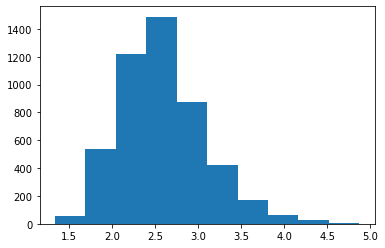

In [19]:
plt.hist(df_train.Old_Dur)

(array([4.000e+00, 2.800e+01, 6.830e+02, 1.837e+03, 1.561e+03, 5.810e+02,
        1.430e+02, 3.000e+01, 8.000e+00, 1.000e+00]),
 array([0.4  , 0.808, 1.216, 1.624, 2.032, 2.44 , 2.848, 3.256, 3.664,
        4.072, 4.48 ]),
 <BarContainer object of 10 artists>)

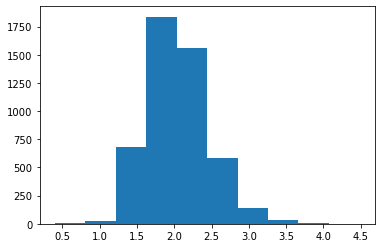

In [20]:
plt.hist(df_train.New_Dur)

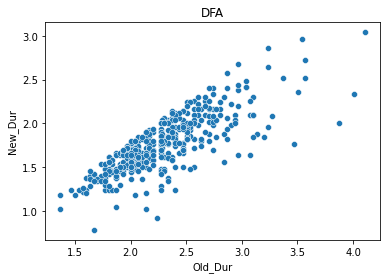

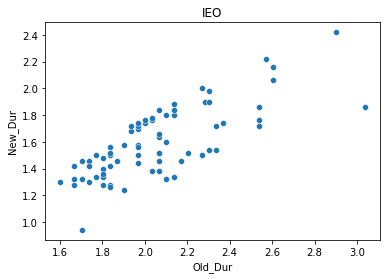

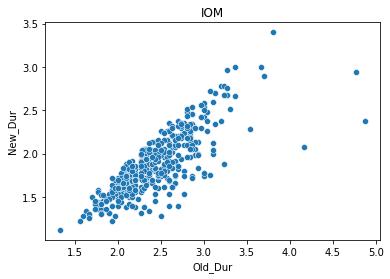

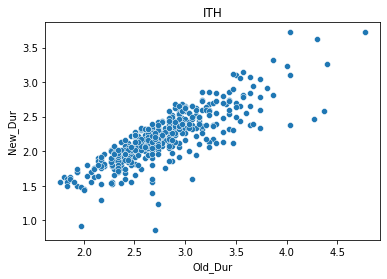

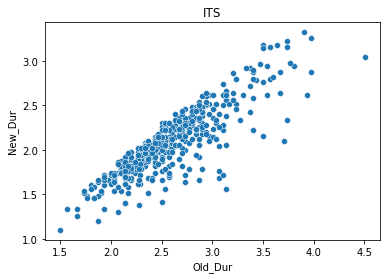

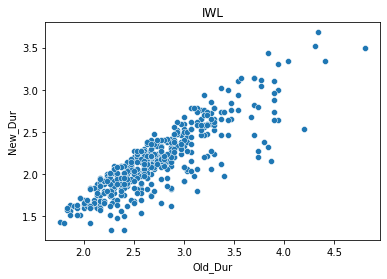

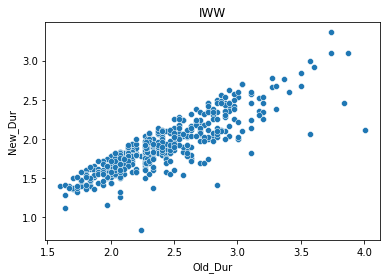

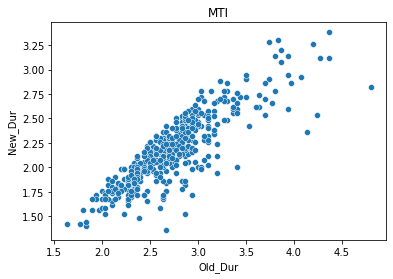

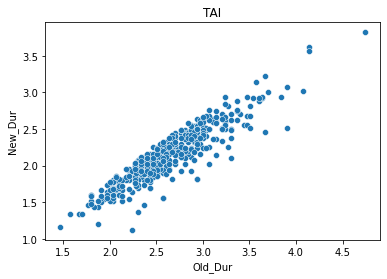

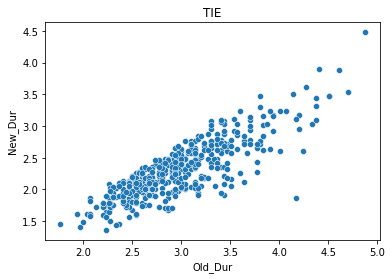

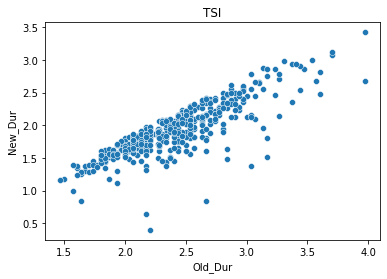

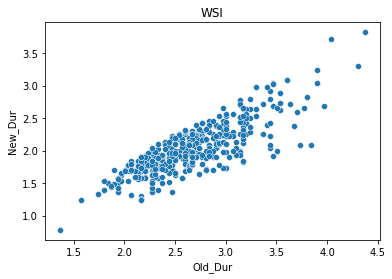

In [21]:
sentences = np.unique(df_train.SentenceID)
for sentence in sentences:
    plt.figure()
    df_sentence = df_train.loc[df_train.SentenceID==sentence]
    sns.scatterplot(data=df_sentence, x='Old_Dur', y='New_Dur')
    plt.title(sentence)